In [1]:
!pip install thefittest
!pip install --upgrade nbformat


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


##Using Genetic Programming for Symbolic Regression

$$y = \frac{1}{2} x \sin(3 x)$$

In [2]:
import numpy as np


def problem(x):
    return np.sin(x[:,0]*3)*x[:,0]*0.5

0-th iteration with the best fitness = 0.8800528140151238
10-th iteration with the best fitness = 0.8705001149934865
20-th iteration with the best fitness = 0.84701544050861
30-th iteration with the best fitness = 0.7771560721115212
40-th iteration with the best fitness = 0.464256317773846
50-th iteration with the best fitness = 0.14061832972767488
60-th iteration with the best fitness = 0.14061832972767488
70-th iteration with the best fitness = 0.02772959669863373
80-th iteration with the best fitness = 0.023339307342115596
90-th iteration with the best fitness = 0.023339307342115596
100-th iteration with the best fitness = 0.023339307342115596
110-th iteration with the best fitness = 0.023339307342115596
120-th iteration with the best fitness = 0.02333930734211551
130-th iteration with the best fitness = 0.02333930734211551
140-th iteration with the best fitness = 0.019832327814080754
150-th iteration with the best fitness = 0.019832327814080754
160-th iteration with the best fitnes

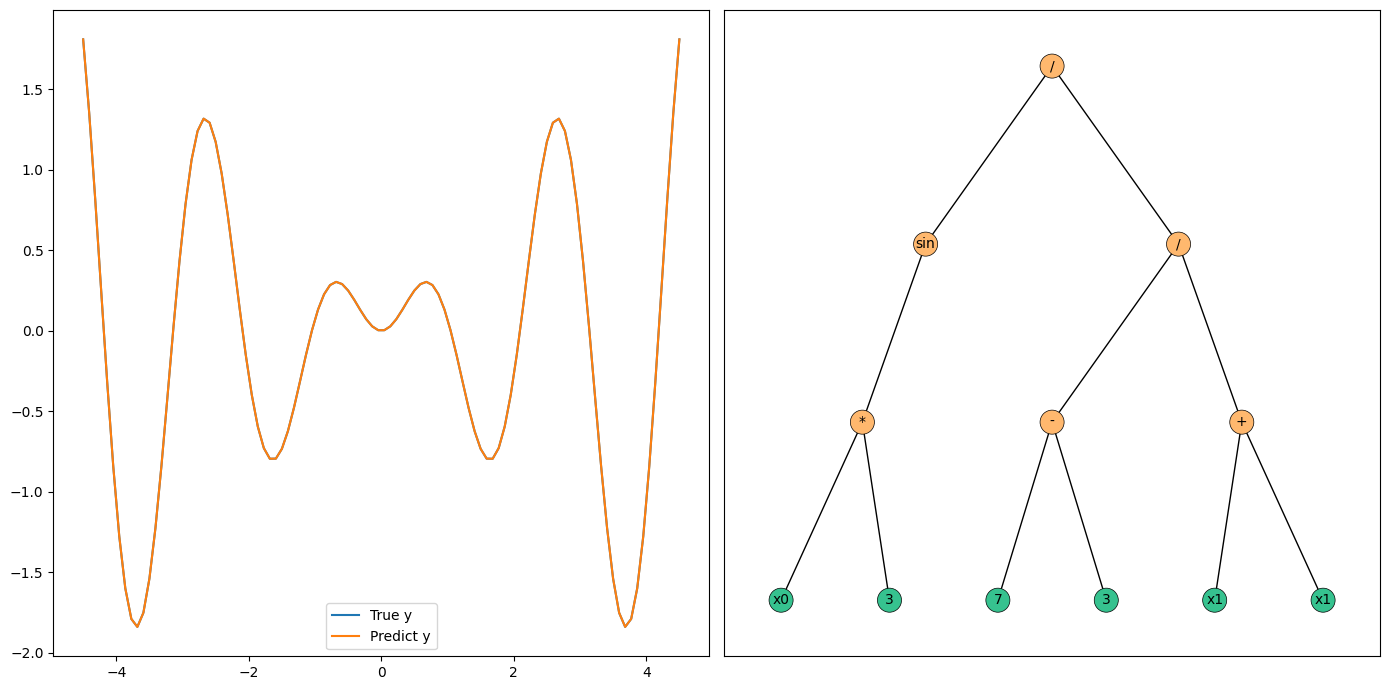

In [3]:
import matplotlib.pyplot as plt

from thefittest.regressors import GeneticProgrammingRegressor
from thefittest.optimizers import PDPGP

n_dimension = 2
left_border = -4.5
right_border = 4.5
sample_size = 100


X = np.array([np.linspace(left_border, right_border, sample_size)
              for _ in range(n_dimension)]).T
y = problem(X)

model = GeneticProgrammingRegressor(n_iter=500,
                                    pop_size=1000,
                                    optimizer=PDPGP,
                                    optimizer_args={"show_progress_each": 10,
                                                    "max_level": 5})

model.fit(X, y)
predict = model.predict(X)

tree = model.get_tree()
print('The fittest individ:', tree)

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=1)

ax[0].plot(X[:,0], y, label = "True y")
ax[0].plot(X[:,0], predict, label = "Predict y")
ax[0].legend()

tree.plot(ax=ax[1])

plt.tight_layout()
plt.show()